# Import Library

Sel ini berisi semua library yang dibutuhkan untuk proyek ini. Library yang diimport adalah:
- **numpy (np)**: untuk operasi numerik dan array, seperti membuat array, matriks, dan melakukan operasi matematika pada array
- **matplotlib.pyplot (plt)**: untuk membuat visualisasi statis, interaktif, dan animasi, seperti membuat plot garis, scatter plot, histogram, dan sebagainya.
- **pandas (pd)**: untuk manipulasi dan analisis data, seperti membaca dan menulis data dari berbagai format file, membersihkan data, dan melakukan agregasi data.
- **seaborn (sns)**: untuk membuat visualisasi statistik yang informatif dan menarik, seperti membuat heatmap, violin plot, dan pair plot.
- **sklearn**: untuk membangun model machine learning, seperti model klasifikasi, regresi, dan clustering. Beberapa modul yang digunakan adalah:
1. **feature_extraction.text**: untuk mengekstrak fitur dari teks, seperti menghitung frekuensi kata atau menggunakan metode TF-IDF.
2. **metrics.pairwise**: untuk menghitung jarak atau kemiripan antara data, seperti menghitung cosine similarity.
- **tensorflow**: untuk membangun dan melatih model deep learning, seperti model neural network.
- **google.colab**: untuk mengakses fitur-fitur Google Colab, seperti mengupload file dan mendownload dataset.

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow
from google.colab import files

# Membaca Data

Bagian ini digunakan untuk membaca data dari file CSV.

- `files.upload()` digunakan untuk mengupload file ke Google Colab.
- `!kaggle datasets download -d arashnic/book-recommendation-dataset` digunakan untuk mengunduh dataset dari Kaggle.
- `!unzip book-recommendation-dataset.zip` digunakan untuk mengekstrak file zip yang telah diunduh.
- `pd.read_csv()` digunakan untuk membaca data dari file CSV dan menyimpannya ke dalam DataFrame pandas.

In [ ]:
files.upload()
!kaggle datasets download -d arashnic/book-recommendation-dataset
!unzip book-recommendation-dataset.zip
books = pd.read_csv('/content/Books.csv')
ratings = pd.read_csv('/content/Ratings.csv')

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
 25% 6.00M/24.3M [00:00<00:00, 61.2MB/s]
100% 24.3M/24.3M [00:00<00:00, 160MB/s] 
Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    


<ipython-input-3-393b31db7b59>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books.csv')


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Eksplorasi Data Analysis (EDA)

Bagian ini digunakan untuk melakukan eksplorasi data analysis (EDA) untuk memahami karakteristik data.

`shape`: untuk melihat dimensi data (jumlah baris dan kolom).


In [ ]:
books.shape

(271360, 8)

In [ ]:
ratings.shape

(1149780, 3)

`info()`: untuk melihat informasi umum tentang data, seperti tipe data, jumlah data yang hilang, dan sebagainya.

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


`describe()`: untuk melihat statistik deskriptif data, seperti mean, median, standar deviasi, dan sebagainya.

In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


# Preprocessing Data

Bagian ini bertujuan untuk membersihkan dan mempersiapkan data sebelum digunakan untuk membangun model.

`rename()`: mengubah nama kolom pada DataFrame `ratings` dan `books` agar lebih mudah diakses.

In [ ]:
ratings = ratings.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})
books = books.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})


Sel di bawah digunakan untuk membatasi jumlah data yang digunakan untuk mempercepat proses training model. Ini adalah pilihan opsional dan dapat diubah sesuai kebutuhan.

In [ ]:
books = books[:10000]
ratings=ratings[:5000]

Kode selanjutnya bertujuan untuk mencari buku-buku dengan rating tertinggi dan menyimpannya dalam list `best_books`.


In [ ]:
ratings[ratings.rating == max(ratings.rating)]
best_booksId = ratings.ISBN[ratings.rating == max(ratings.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

In [ ]:
best_books = []
for i in best_booksId:
    books_name = books.book_title[books.ISBN == i]
    best_books.append(books_name)

In [ ]:
len(best_books)

300

Sel di bawah digunakan untuk membuat visualisasi distribusi rating buku
 dan tahun publikasi buku dalam bentuk bar chart.

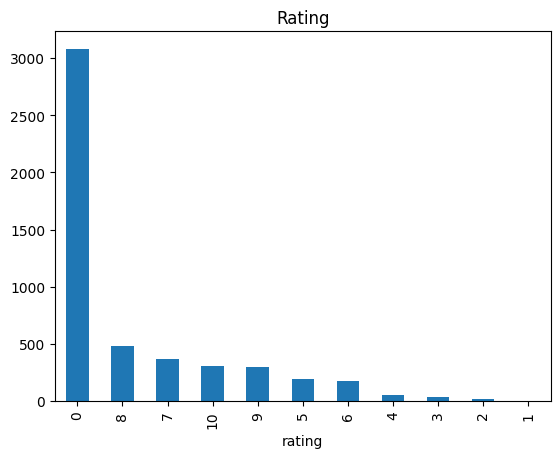

In [ ]:
count = ratings["rating"].value_counts()
count.plot(kind='bar', title="Rating");

<ipython-input-28-85edf053d685>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, palette="viridis")  # Gunakan seaborn dan palette yang menarik


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61],
 [Text(0, 0, '0'),
  Text(1, 0, '1920'),
  Text(2, 0, '1937'),
  Text(3, 0, '1940'),
  Text(4, 0, '1941'),
  Text(5, 0, '1942'),
  Text(6, 0, '1950'),
  Text(7, 0, '1951'),
  Text(8, 0, '1952'),
  Text(9, 0, '1953'),
  Text(10, 0, '1954'),
  Text(11, 0, '1955'),
  Text(12, 0, '1956'),
  Text(13, 0, '1957'),
  Text(14, 0, '1958'),
  Text(15, 0, '1959'),
  Text(16, 0, '1960'),
  Text(17, 0, '1961'),
  Text(18, 0, '1962'),
  Text(19, 0, '1963'),
  Text(20, 0, '1964'),
  Text(21, 0, '1965'),
  Text(22, 0, '1966'),
  Text(23, 0, '1967'),
  Text(24, 0, '1968'),
  Text(25, 0, '1969'),
  Text(26, 0, '1970'),
  Text(27, 0, '1971'),
  Text

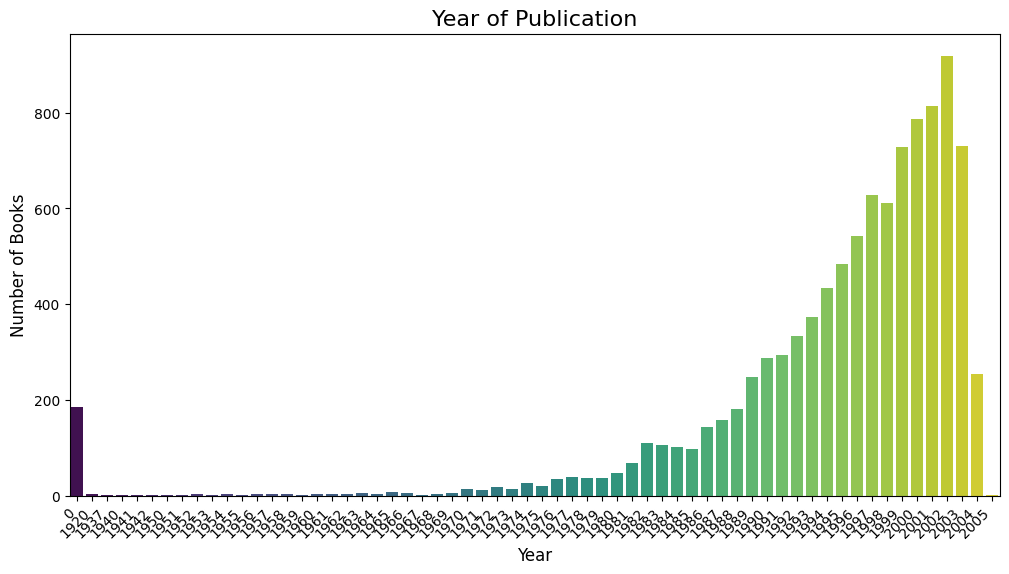

In [ ]:
count = books["year_of_publication"].value_counts()

# Urutkan data berdasarkan tahun
count = count.sort_index()

plt.figure(figsize=(12, 6))  # Sesuaikan ukuran figure
sns.barplot(x=count.index, y=count.values, palette="viridis")  # Gunakan seaborn dan palette yang menarik

plt.title("Year of Publication", fontsize=16)  # Perbesar ukuran font judul
plt.xlabel("Year", fontsize=12)  # Perbesar ukuran font label sumbu x
plt.ylabel("Number of Books", fontsize=12)  # Perbesar ukuran font label sumbu y
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotasi label sum

Membuat matriks scatter plot dari semua pasangan kolom numerik dalam DataFrame `ratings`, serta histogram atau kernel density estimate (KDE) untuk setiap kolom individual pada diagonal.
- `ratings`: DataFrame yang berisi data yang akan divisualisasikan.
- `diag_kind='kde'`: Menentukan jenis plot yang akan ditampilkan pada diagonal. Dalam kasus ini, `'kde'` menunjukkan bahwa kernel density estimate (KDE) akan digunakan untuk memvisualisasikan distribusi data pada diagonal.

Tujuan: Membantu dalam memahami hubungan dan distribusi antar variabel numerik dalam data. Pair plot memberikan gambaran visual yang cepat tentang korelasi, outlier, dan pola dalam data.

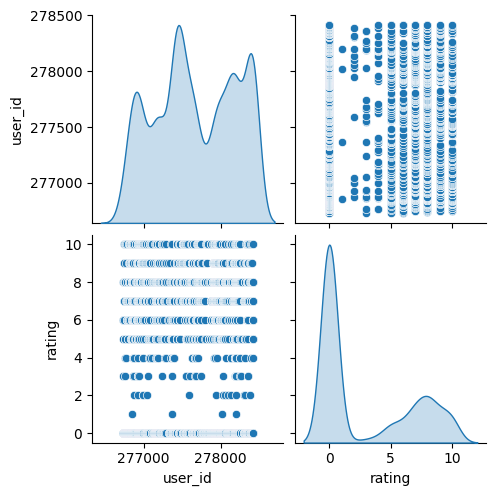

In [ ]:
sns.pairplot(ratings, diag_kind = 'kde')

Menghapus baris yang mengandung nilai missing (NaN) dari DataFrame `books` dan `ratings`.

Tujuan: Membersihkan data dengan menghilangkan baris yang tidak lengkap, sehingga data yang digunakan untuk analisis lebih valid.

In [ ]:
books = books.dropna()
ratings = ratings.dropna()

Menghapus baris duplikat dari DataFrame `books` dan `ratings`.

Tujuan: Membersihkan data dengan memastikan setiap baris data unik, sehingga menghindari bias dalam analisis.

In [ ]:
ratings = ratings.drop_duplicates()
books = books.drop_duplicates()

In [ ]:
books.shape

(10000, 8)

In [ ]:
ratings.shape

(5000, 3)

Melihat sekilas struktur dan isi data dalam DataFrame setelah proses pembersihan data dilakukan. Ini berguna untuk verifikasi dan memastikan data telah bersih dan siap untuk tahap selanjutnya.

In [ ]:
books.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# Content-Based Filtering (Rekomendasi Berdasarkan Penulis)

Bagian ini mengimplementasikan sistem rekomendasi berbasis konten, dengan fokus pada penulis buku.

Data buku diubah menjadi DataFrame baru bernama `book` yang hanya berisi kolom yang relevan.

In [ ]:
book_ISBN = books['ISBN'].tolist()
book_title = books['book_title'].tolist()
book_author = books['book_author'].tolist()
book_year_of_publication = books['year_of_publication'].tolist()

book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})

`TfidfVectorizer` digunakan untuk membuat representasi numerik dari penulis buku berdasarkan frekuensi kemunculan kata dalam nama penulis.

In [ ]:
tf = TfidfVectorizer()
tf.fit(book['book_author'])
tf.get_feature_names_out()

array(['aaron', 'aarsen', 'abbey', ..., 'âºlveda', 'â¼ltner', 'â¼skind'],
      dtype=object)

In [ ]:
tfidf_matrix = tf.fit_transform(book['book_author'])
tfidf_matrix.shape

(10000, 5575)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=book.book_title
).sample(10, axis=1,replace=True).sample(10, axis=0)

,klavan,ashley,entertainment,dufresne,donoghue,wearing,mccammon,crews,beam,jessica
book_title,,,,,,,,,,
The Call of the Wild: And Selected Stories (Signet Classics (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hidden in Plain View: A Secret Story of Quilts and the Underground Railroad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Scarlet Letter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Giorni Dell'abbandono,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Skin And Bones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Self-Reliance and Other Essays (Dover Thrift Editions),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Passing for Thin : Losing Half My Weight and Finding My Self,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Speaker for the Dead (Ender Wiggins Saga (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`cosine_similarity` digunakan untuk menghitung kemiripan antar buku berdasarkan representasi TF-IDF dari penulisnya.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

Fungsi `author_recommendations` dibuat untuk memberikan rekomendasi buku berdasarkan kemiripan penulis dengan buku yang telah dibaca.

In [ ]:
def author_recommendations(i, M, items, k=10):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4700,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


In [ ]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])
recommendations = recommendations.drop_duplicates()
recommendations

,book_title,book_author
0,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
1,Adventures of Huckleberry Finn,Mark Twain
2,Treasury of Illustrated Classics: Adventures o...,Mark Twain
3,The Complete Short Stories of Mark Twain (Bant...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain
5,A Connecticut Yankee in King Arthur's Court (B...,Mark Twain
6,The Adventures of Tom Sawyer,Mark Twain
8,The Adventures of Tom Sawyer (Penguin Popular ...,Mark Twain
9,Adventures of Huckleberry Finn (Dover Thrift E...,Mark Twain


- Memfilter DataFrame `books` dan mengambil baris di mana kolom `book_title` sama dengan nilai variabel `books_that_have_been_read` (buku yang telah dibaca). Hasilnya disimpan dalam variabel `books_that_have_been_read_row`. Tujuan: Mendapatkan informasi lengkap tentang buku yang telah dibaca, termasuk penulisnya, dari DataFrame `books`.
- Mengambil nilai dari kolom `book_author` (penulis buku) dari baris pertama (indeks 0) pada DataFrame `books_that_have_been_read_row`. Nilai ini kemudian disimpan dalam variabel `books_that_have_been_read_author`. Tujuan: Mendapatkan nama penulis dari buku yang telah dibaca.

In [ ]:
books_that_have_been_read_row = books[books.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

Mengambil kolom `book_author` dari DataFrame `recommendations` (hasil rekomendasi buku) dan menyimpannya dalam variabel `book_recommendation_authors`. Tujuan: Mendapatkan daftar penulis dari buku-buku yang direkomendasikan.

In [ ]:
book_recommendation_authors = recommendations.book_author

Melakukan iterasi dan memeriksa apakah penulis buku yang direkomendasikan sama dengan penulis buku yang telah dibaca. Jika sama, variabel `real_author` akan diincrement (ditambah 1). Tujuan: Menghitung jumlah buku yang direkomendasikan yang memiliki penulis yang sama dengan buku yang telah dibaca. Ini digunakan untuk mengevaluasi akurasi model rekomendasi.

In [ ]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == books_that_have_been_read_author:
        real_author+=1

Menghitung akurasi model rekomendasi dengan membagi jumlah buku yang direkomendasikan dengan penulis yang sama (`real_author`) dengan total jumlah buku yang direkomendasikan dan mengalikannya dengan 100. Hasilnya kemudian dicetak ke konsol. Tujuan: Mengevaluasi seberapa baik model rekomendasi dalam merekomendasikan buku-buku dari penulis yang sama dengan buku yang telah dibaca oleh pengguna.

In [ ]:
Accuracy = real_author/5*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 100.0%


# Collaborative Filtering (Rekomendasi Berdasarkan Rating Pengguna)
## Encoding User dan Book ID

Mengubah `user_id` dan `ISBN` (yang mungkin berupa string atau angka yang tidak berurutan) menjadi representasi numerik (integer) yang berurutan mulai dari 0.

Tujuan: Mempersiapkan data agar dapat diproses oleh model deep learning, yang biasanya membutuhkan input numerik.

Dictionary Encoding:
- `user_to_user_encoded`: Memetakan `user_id` asli ke nilai integer yang dienkode.
- `user_encoded_to_user`: Memetakan nilai integer yang dienkode kembali ke `user_id` asli.
- `book_to_book_encoded`: Memetakan `ISBN` asli ke nilai integer yang dienkode.
- `book_encoded_to_book`: Memetakan nilai integer yang dienkode kembali ke `ISBN` asli.

In [ ]:
user_ids = ratings['user_id'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

book_ids = ratings['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

ratings['user'] = ratings['user_id'].map(user_to_user_encoded)
ratings['book'] = ratings['ISBN'].map(book_to_book_encoded)

# Dokumentasi Persiapan Data untuk Collaborative Filtering
## Menghitung Jumlah User dan Book

Menghitung jumlah total user dan buku yang unik dalam dataset. Tujuan: Informasi ini akan digunakan dalam membangun arsitektur model deep learning, khususnya untuk menentukan ukuran layer embedding.

In [ ]:
num_users = len(user_encoded_to_user)
print(num_users)

679


In [ ]:
num_book = len(book_encoded_to_book)
print(num_book)

4688


## Mengubah Tipe Data Rating dan Normalisasi

- Mengubah tipe data kolom `rating` menjadi `float32` untuk kompatibilitas dengan TensorFlow.
- Melakukan normalisasi nilai rating ke rentang 0 hingga 1 menggunakan Min-Max scaling.

Tujuan:
- Memastikan data rating dalam format yang sesuai untuk model deep learning.
- Normalisasi membantu meningkatkan performa dan stabilitas model dengan membawa nilai rating ke skala yang sama.

In [ ]:
ratings['rating'] = ratings['rating'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print('Number of User: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

Number of User: 679, Number of Books: 4688, Min Rating: 0.0, Max Rating: 10.0


## Mengacak Data

Mengacak urutan baris dalam DataFrame `ratings`.

Tujuan: Memastikan data training dan validasi terdistribusi secara acak, sehingga model tidak belajar pola yang tidak diinginkan dari urutan data asli. `random_state=42` digunakan untuk memastikan pengacakan yang sama setiap kali kode dijalankan.

In [ ]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


## Membagi Data menjadi Input (x) dan Output (y)

Memisahkan data menjadi variabel input (x) dan output (y).

Tujuan: Menyiapkan data dalam format yang dibutuhkan oleh model deep learning.
- `x`: Berisi pasangan `user` dan `book` yang dienkode, merepresentasikan interaksi antara user dan buku.
- `y`: Berisi nilai rating yang telah dinormalisasi, merepresentasikan target yang ingin diprediksi oleh model.

In [ ]:
x = ratings[['user', 'book']].values
y = ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

## Membagi Data menjadi Training dan Validasi

Membagi data input (x) dan output (y) menjadi data training dan data validasi.

Tujuan:
- Data training digunakan untuk melatih model deep learning.
- Data validasi digunakan untuk mengevaluasi performa model selama proses training dan mencegah overfitting.

Proporsi Pembagian: Dalam kasus ini, 70% data digunakan untuk training dan 30% untuk validasi.

In [ ]:
train_indices = int(0.70 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


## Kelas `RecommenderNet`

Mendefinisikan arsitektur model deep learning untuk Collaborative Filtering. Kelas ini merupakan subclass dari `tf.keras.Model`, yang menyediakan struktur dasar untuk membangun model di TensorFlow.

Tujuan: Merepresentasikan model yang akan mempelajari pola dari data rating dan digunakan untuk memprediksi rating buku yang belum dibaca oleh user.

###Metode `__init__`

Metode konstruktor yang dijalankan saat objek `RecommenderNet` dibuat.

Tujuan: Menginisialisasi layer-layer yang dibutuhkan oleh model.

Parameter:
- `num_users`: Jumlah total user.
- `num_resto`: Jumlah total buku (dalam kode Anda, variabel ini bernama `num_book`).
- `embedding_size`: Dimensi ruang embedding untuk user dan buku.
- `**kwargs`: Argumen keyword tambahan yang diteruskan ke konstruktor `tf.keras.Model`.

Layer-layer:
- `user_embedding`: Layer embedding untuk user.
- `user_bias`: Layer bias untuk user.
- `resto_embedding`: Layer embedding untuk buku.
- `resto_bias`: Layer bias untuk buku.

Embedding: Teknik untuk merepresentasikan entitas diskrit (user dan buku) sebagai vektor dalam ruang kontinu. Ini memungkinkan model untuk mempelajari hubungan semantik antara user dan buku.

Bias: Nilai konstan yang ditambahkan ke output layer untuk meningkatkan fleksibilitas model.

###Metode `call`
Metode `call` mendefinisikan alur perhitungan (forward pass) model `RecommenderNet`. Ini adalah fungsi yang akan dijalankan ketika model di panggil dengan input data.

Tujuan utama metode `call` adalah untuk menghitung prediksi rating buku oleh user berdasarkan input berupa pasangan user dan buku.

Parameter:
- `inputs`: Tensor input yang berisi pasangan user dan buku yang telah dienkode. Bentuknya adalah `(batch_size, 2)`, di mana `batch_size` adalah jumlah sampel dalam satu batch dan 2 merepresentasikan kolom user dan buku.

Langkah-langkah Perhitungan:
1. Mendapatkan Embedding dan Bias:
- `user_vector = self.user_embedding(inputs[:,0])`: Mengambil vektor embedding untuk user dari layer `user_embedding` berdasarkan indeks user (`inputs[:,0]`).
- `user_bias = self.user_bias(inputs[:, 0])`: Mengambil bias untuk user dari layer `user_bias`.
- `resto_vector = self.resto_embedding(inputs[:, 1])`: Mengambil vektor embedding untuk buku dari layer `resto_embedding` berdasarkan indeks buku (`inputs[:,1]`).
- `resto_bias = self.resto_bias(inputs[:, 1])`: Mengambil bias untuk buku dari layer `resto_bias`.
2. Menghitung Dot Product:

`dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)`: Menghitung dot product antara vektor embedding user dan buku. Dot product mengukur kemiripan antara kedua vektor.
3. Menambahkan Bias:

`x = dot_user_resto + user_bias + resto_bias`: Menambahkan bias user dan buku ke hasil dot product. Ini menambahkan fleksibilitas ke model dan memungkinkan untuk mempelajari pola interaksi yang lebih kompleks.
4. Menerapkan Fungsi Aktivasi Sigmoid:

`return tf.nn.sigmoid(x)`: Menerapkan fungsi aktivasi sigmoid pada hasil perhitungan. Sigmoid mengonversi output ke rentang 0 hingga 1, yang merepresentasikan prediksi rating.

Output: Metode `call` mengembalikan tensor yang berisi prediksi rating untuk setiap pasangan user dan buku dalam input. Bentuk tensor output adalah `(batch_size, 1)`.

In [ ]:
class RecommenderNet(tensorflow.keras.Model):

  def __init__(self, num_users, num_books, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_books = num_books
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.books_embedding = layers.Embedding(
        num_books,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.books_bias = layers.Embedding(num_books, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    books_vector = self.books_embedding(inputs[:, 1])
    books_bias = self.books_bias(inputs[:, 1])

    dot_user_books = tensorflow.tensordot(user_vector,books_vector, 2)

    x = dot_user_books + user_bias + books_bias

    return tensorflow.nn.sigmoid(x)

1. `model = RecommenderNet(num_users, num_book, 50)`:
- Membuat instance dari kelas `RecommenderNet`, yang telah didefinisikan sebelumnya.
- `num_users`: Jumlah total pengguna unik dalam dataset.
- `num_book`: Jumlah total buku unik dalam dataset.
- `50`: Dimensi ruang embedding untuk user dan buku (embedding size). Nilai ini dapat diubah sesuai kebutuhan.
2. `model.compile(...)`:
- Mengompilasi model dengan menentukan fungsi loss, optimizer, dan metrik evaluasi.
- `loss = tensorflow.keras.losses.BinaryCrossentropy()`: Fungsi loss yang digunakan untuk mengukur perbedaan antara prediksi model dan nilai rating sebenarnya. Binary Crossentropy cocok untuk kasus rating biner (misalnya, suka/tidak suka). Dalam kasus rating skala, seperti dalam dataset ini, mungkin lebih baik menggunakan fungsi loss lain seperti Mean Squared Error (MSE).
- `optimizer = keras.optimizers.Adam(learning_rate=0.001)`: Optimizer yang digunakan untuk mengupdate bobot model selama proses training. Adam adalah optimizer yang umum digunakan dalam deep learning. `learning_rate` menentukan seberapa besar langkah update bobot pada setiap iterasi.
- `metrics=[tensorflow.keras.metrics.RootMeanSquaredError()]`: Metrik yang digunakan untuk mengevaluasi performa model. Root Mean Squared Error (RMSE) mengukur rata-rata perbedaan kuadrat antara prediksi dan nilai rating sebenarnya.

In [ ]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tensorflow.keras.metrics.RootMeanSquaredError()]
)

- Melatih model menggunakan data training.
- `x = x_train`: Input data training (pasangan user dan buku yang dienkode).
- `y = y_train`: Output data training (nilai rating yang telah dinormalisasi).
- `batch_size = 5`: Jumlah sampel data yang diproses dalam setiap iterasi training.
- `epochs = 20`: Jumlah iterasi training pada seluruh dataset.
- `validation_data = (x_val, y_val)`: Data validasi yang digunakan untuk memantau performa model selama training.

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.6809 - root_mean_squared_error: 0.4272 - val_loss: 0.6414 - val_root_mean_squared_error: 0.4099
Epoch 2/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5953 - root_mean_squared_error: 0.3764 - val_loss: 0.6108 - val_root_mean_squared_error: 0.3920
Epoch 3/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5357 - root_mean_squared_error: 0.3443 - val_loss: 0.5954 - val_root_mean_squared_error: 0.3835
Epoch 4/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5106 - root_mean_squared_error: 0.3343 - val_loss: 0.5816 - val_root_mean_squared_error: 0.3761
Epoch 5/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4883 - root_mean_squared_error: 0.3169 - val_loss: 0.5700 - val_root_mean_squared_error: 0.3703
Epoch 6/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4748 - root_mean_squared_error: 0.3071 - val_loss: 0.5602 - val_root_mean_squared_error: 0.3655
Epoch 7/20
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/ste

Sel di bawah digunakan untuk
- Memvisualisasikan metrik evaluasi (RMSE) selama proses training.
- Menampilkan grafik RMSE untuk data training dan data validasi.

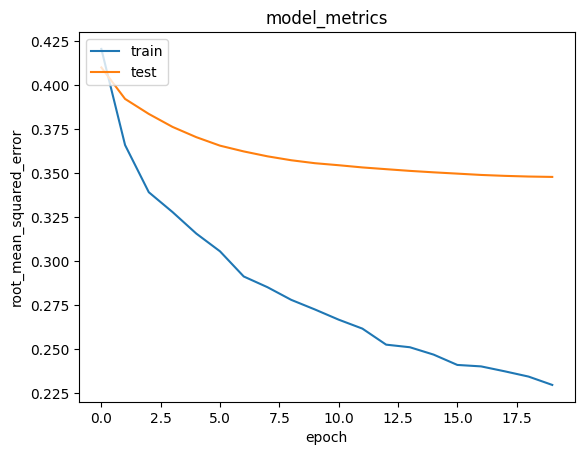

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Sel di bawah digunakan untuk
- Memilih secara acak satu `user_id` dari DataFrame `ratings`.
- `sample(1)` mengambil satu sampel acak.
- `iloc[0]` mengambil nilai dari baris pertama (indeks 0) dari sampel tersebut.
- `user_id` akan menyimpan ID pengguna yang terpilih.

In [ ]:
user_id = ratings.user_id.sample(1).iloc[0]
books_have_been_read_by_user = ratings[ratings.user_id == user_id]

Sel di bawah digunakan untuk membuat DataFrame baru bernama `books_have_been_read_by_user` yang berisi semua rating buku yang telah diberikan oleh pengguna dengan `user_id` yang terpilih.

In [ ]:
books_have_not_been_read_by_user = book[book['book_ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['book_ISBN']
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)

Sel di bawah digunakan untuk
- Bagian ini bertujuan untuk mendapatkan daftar buku yang belum dibaca oleh pengguna.
- Pertama, mengambil semua `book_ISBN` dari buku yang telah dibaca oleh user.
- Kemudian, menggunakan `intersection` untuk menemukan buku-buku yang ada di dataset book dan juga di daftar buku yang telah dibaca.
- Terakhir, mengonversi `book_ISBN` ke dalam bentuk encoded menggunakan `book_to_book_encoded`.

In [ ]:
books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]

Sel di bawah digunakan untuk mendapatkan representasi encoded dari `user_id` menggunakan dictionary `user_to_user_encoded`.

In [ ]:
user_encoder = user_to_user_encoded.get(user_id)

Sel di bawah digunakan untuk
- Membuat array `user_book_array` yang berisi pasangan `user_encoder` dan book_encoded untuk setiap buku yang belum dibaca oleh pengguna.
`[[user_encoder]] * len(books_have_not_been_read_by_user)`: Membuat array dengan `user_encoder` yang diulang sebanyak jumlah buku yang belum dibaca.
- `np.hstack`: Menggabungkan array `user_encoder` dan `books_have_not_been_read_by_user` secara horizontal.

In [ ]:
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

- Menggunakan model yang telah dilatih (`model`) untuk memprediksi rating buku yang belum dibaca oleh pengguna (`user_book_array`).
- `flatten()`: Mengubah hasil prediksi menjadi array satu dimensi.

In [ ]:
ratings = model.predict(user_book_array).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


- Mendapatkan indeks 10 rating tertinggi dari hasil prediksi.
- `argsort()`: Mengembalikan indeks yang akan mengurutkan array.
- `[-10:][::-1]`: Mengambil 10 indeks terakhir (rating tertinggi) dan membalik urutannya.

In [ ]:
top_ratings_indices = ratings.argsort()[-10:][::-1]

- Mendapatkan `book_ISBN` dari buku-buku yang direkomendasikan berdasarkan `top_ratings_indices`.
- `book_encoded_to_book`: Digunakan untuk mendekode indeks buku kembali ke `book_ISBN`.

In [ ]:
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]

- Mendapatkan `book_ISBN` dari 5 buku dengan rating tertinggi yang telah dibaca oleh pengguna.
- Ini digunakan sebagai informasi tambahan untuk ditampilkan.

In [ ]:
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)

- Menampilkan judul dan penulis dari 10 buku dengan rating tertinggi yang telah dibaca oleh pengguna.

In [ ]:
books_row = book[book['book_ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)

print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)

recommended_books = book[book['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

Politically Correct Bedtime Stories: Modern Tales for Our Life and Times : James Finn Garner
--------------------------------
Top 10 Book Recommendation for user: 277427
--------------------------------
The Street Lawyer : JOHN GRISHAM
One for the Money (Stephanie Plum Novels (Paperback)) : Janet Evanovich
No Safe Place : RICHARD NORTH PATTERSON
Trading Places : Fern Michaels
Tell No One : Harlan Coben
On a Wicked Dawn (Cynster Novels) : Stephanie Laurens
The Hobbit : The Enchanting Prelude to The Lord of the Rings : J.R.R. TOLKIEN
The Calvin and Hobbes Tenth Anniversary Book : Bill Watterson
Where the Red Fern Grows : Wilson Rawls
The Red Badge of Courage : Stephen Crane
